## Read in the Data

In [1]:
# Imports and colors and numbers that won't change
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import scipy.stats as stats
#First year of data will not change, last year is not inclusive
min_data_year = 1880
max_data_year = 2025
female_color = 'xkcd:pink'
male_color = 'xkcd:light blue'
default_color = 'xkcd:periwinkle'
default_color2 = 'xkcd:grass green'
colors = ['xkcd:red','xkcd:orange','xkcd:mustard','xkcd:grass green', 'xkcd:light blue','xkcd:cerulean','xkcd:indigo', 
          'xkcd:lavender', 'xkcd:pink', 'xkcd:black', 'xkcd:tan', 'xkcd:grey blue']
generation_starts = {'Missionary' : 1880, 'Lost' : 1883, 'Greatest' : 1901, 'Silent' : 1928, 'Boomers' : 1946, 'Gen X' : 1965, 'Milennial' : 1981,
                     'Gen X' : 1997, 'Gen Alpha' : 2010}

In [2]:
# data = pd.DataFrame(columns = ['name', 'sex', 'total_count'] + [str(year) for year in range(1880, 2025)])
# for i in range(min_data_year, max_data_year):
#     current_df = pd.read_csv("names/yob"+str(i)+".txt", delimiter = ",", names = ['Name', 'Sex', 'Count'])
#     for index, row in current_df.iterrows():
#         current_name = row['Name']
#         current_sex = row['Sex']
#         current_count = row['Count']
#         current_year = str(i)
#         matches = (data['name'] == current_name) & (data['sex'] == current_sex)
#         if matches.any():
#             data.loc[matches, current_year] = current_count
#             data.loc[matches, 'total_count'] += current_count
#         else:
#             new_row = {col: 0 for col in data.columns}
#             new_row = {col: 0 for col in data.columns}
#             new_row['name'] = current_name
#             new_row['sex'] = current_sex
#             new_row[current_year] = current_count
#             new_row['total_count'] = current_count
#             data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

# data
# data.to_csv("SSANameData.txt")

In [ ]:
data = pd.read_csv("SSANameData.txt")

## Methods

In [108]:
import functions

In [4]:
def name_input(input_type):
    name = input(f"Enter the {input_type}: ").lower()
    sex = ""
    while sex != 'f' and sex != 'm':
        sex = input("Enter M for Male and F for Female: ").lower()
    return name, sex

In [88]:
def single_line_name_input():
    line = input("Enter name, sex, single year, min year, max_year sparated by comma, no spaces: ")
    return line

In [5]:
def year_input():
    enter_years = input("Enter y to set min/max years and q to quit: ").lower()
    min_y = 0
    max_y = 0
    if enter_years == "y":
        while min_y < min_data_year or max_y > max_data_year:
            print(f"the data ranges from {min_data_year} to {max_data_year - 1}")
            min_y = int(input("Enter the minimum year: "))
            max_y = int(input("Enter the maximum year: "))
        max_y += 1
    else:
        min_y = min_data_year
        max_y = max_data_year
    return min_y, max_y

In [6]:
def single_year_input(min_y = min_data_year, max_y = (max_data_year - 1), type = "count"):
    year = 0
    while year < min_y or year > max_y:
        print(f"the data ranges from {min_y} to {max_y}")
        try:
            year = int(input(f"Enter a specific year to see the {type}"))
        except ValueError:
            print("please enter a number")
    return year

In [89]:
def multiple_inputs():
    stop = False
    name_list = []
    sex_list = []
    while stop == False:
        name, sex, cont = input("Enter name, sex, continue (c or q) sparated by comma, no spaces: ").lower().split(',')
        name_list.append(name)
        sex_list.append(sex)
        stop = (cont == 'q')
    min_y, max_y = year_input()
    year = single_year_input(min_y, max_y)
    return name_list, sex_list, year, min_y, max_y

In [87]:
def first_nonzero(name_list, min_y = min_data_year):
    name_list = np.array(name_list)
    i = np.nonzero(name_list)
    return i[0][0] + min_y

def last_nonzero(name_list, min_y = min_data_year):
    name_list = np.array(name_list)
    i = np.nonzero(name_list)
    return i[0][-1] + min_y

In [47]:
def peak_year(name_list, min_y = min_data_year):
    max_value = max(name_list)
    max_index = name_list.index(max_value) + min_y
    return max_index, int(max_value)

In [95]:
def calculate_percent_change(name_counts):
    initial = name_counts[0]
    initial = initial if initial > 0 else 1
    final = name_counts[-1]
    final = final if final > 0 else 1
    return (final - initial) / initial * 100, int(initial), int(final)

def calculate_percent_diff(v1, v2):
    return abs(v1 - v2) / ((v1 + v2) / 2) * 100

In [70]:
def get_rank(name, sex, year):
    current_data = pd.read_csv("names/yob" + str(year) + ".txt", names = ['Name', 'Sex', 'Count'])
    current_data = current_data[current_data['Sex'] == sex.upper()]
    name_list = current_data['Name'].apply(lambda x : x.lower()).tolist()
    if name in name_list:
        return name_list.index(name) + 1
    else:
        return -1

In [45]:
def name_counts_years(name, sex, year, min_y = min_data_year, max_y = max_data_year, function = np.equal):
    current_data = data[function(name, data['name'])]
    length = len(current_data)
    current_data = current_data[current_data['sex'] == sex]
    length = len(current_data)
    current_data.loc['total'] = current_data.sum(numeric_only=True)
    current_data.loc['num_names'] = (current_data.iloc[0:length] != 0).sum(axis=0)

    year_columns = [str(y) for y in range(min_y, max_y)]
    name_counts = current_data.loc['total', year_columns].tolist()
    # name_counts = current_data[year_columns]
    num_names = current_data.loc['num_names',  (str(min_y)):(str(max_y - 1))].tolist()
    # num_names = (current_data[year_columns] != 0).sum()
    return name_counts, num_names


In [92]:
def make_graph(title, x, y, year, label, color = default_color, show = True, x_label = 'year', y_label = 'count'):
    plt.plot(x, y, color = color, label = label)
    format_graph(title, year, show, x_label, y_label)

def format_graph(title, year, show = True, x_label = 'year', y_label = 'count'):
    if show == True:
        plt.axvline(x = year, label = year, color = 'xkcd:grey', linestyle = '--')
    plt.xlabel(y_label)
    plt.ylabel(x_label)
    plt.legend()
    plt.title(title)
    plt.grid(True)

## Graphs

### Single Name Graph
Give one name and the associated sex and a graph will be displayed of the number of babies of that sex given that name over time. The default range of years is 1880 to the most recent year, but can be changed. A single year is also  given, within the range, to print the specific count and rank for that year and to be displaayed on the graph.

the data ranges from 1880 to 2025


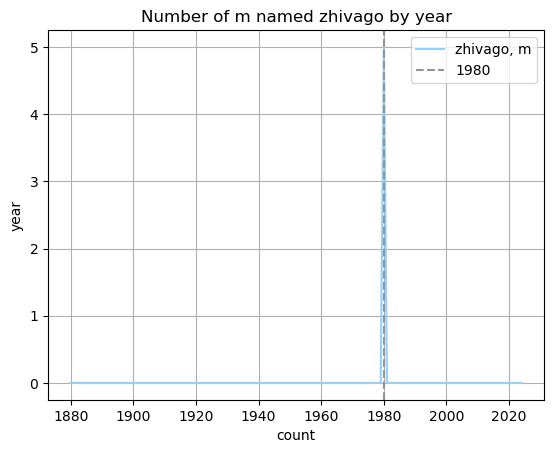

The first year with more than five of this start was 1980
The last year with more than five of this start was 1980
The name peaked in 1980 with 5
In 1980 there were 5 m babies given the name zhivago and its rank was 7292
There have been a total of 5 babies named zhivago
The name decreased from 1 to 1, a 0.00% decrease over 1880 to 2024


In [ ]:
name, sex = name_input("name")
min_y, max_y = year_input()
year = single_year_input(min_y, max_y)
show = True
name_counts, ignore = name_counts_years(name, sex, year, min_y, max_y)
earliest_year = first_nonzero(name_counts, min_y)
latest_year = last_nonzero(name_counts, min_y)

total_sum = int(sum(name_counts))
percent_change, initial, final = calculate_percent_change(name_counts)
rank = get_rank(name, sex, year)
change_verb = "increase" if percent_change > 0 else "decrease"
percent_change = abs(percent_change)
color = female_color if sex == 'f' else male_color
peak_count_year, peak_count = peak_year(name_counts, min_y)
title = f"Number of {sex} named {name} by year"
label = f"{name}, {sex}"
make_graph(title, range(min_y, max_y), name_counts, year, label, color, True)
plt.show()

print(f"The first year with more than five of this start was {earliest_year}")
print(f"The last year with more than five of this start was {latest_year}")
print(f"The name peaked in {peak_count_year} with {peak_count}")
print(f"In {year} there were {int(name_counts[year - min_y])} {sex} babies given the name {name} and its rank was {rank}")
print(f"There have been a total of {total_sum} babies named {name}")
print(f"The name {change_verb}d from {initial} to {final}, a {percent_change:.2f}% {change_verb} over {min_y} to {max_y - 1}")

### Multiple Name Graph
Performs the same operations as above, but for multiple names and their associated sexes. The year range can be altered and a single year is given to be graphed, but no additional information is printed

the data ranges from 1880 to 2025


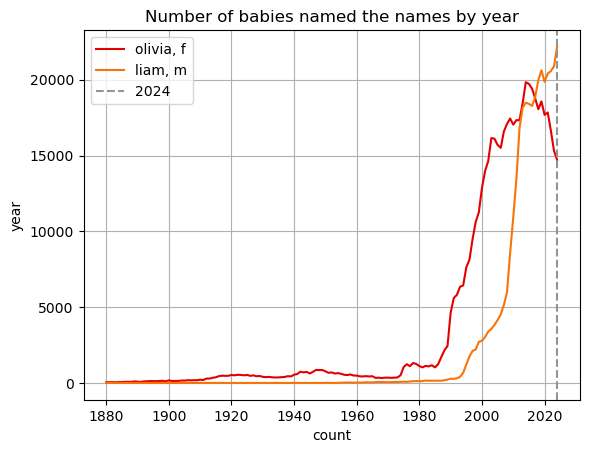

In [ ]:
name_list, sex_list, year, min_y, max_y = multiple_inputs()

color_index = 0

for i in range(len(name_list)):
    name_counts, ignore = name_counts_years(name_list[i], sex_list[i], year, min_y, max_y)
    plt.plot(range(min_y, max_y), name_counts, color = colors[color_index], label = f"{name_list[i]}, {sex_list[i]}")
    if color_index == len(colors) - 1:
        color_index = 0
    else:
        color_index += 1

format_graph("Number of babies named the names by year", year, show = True)
plt.show()

### Same Name For Both Sexes

the data ranges from 1880 to 2025


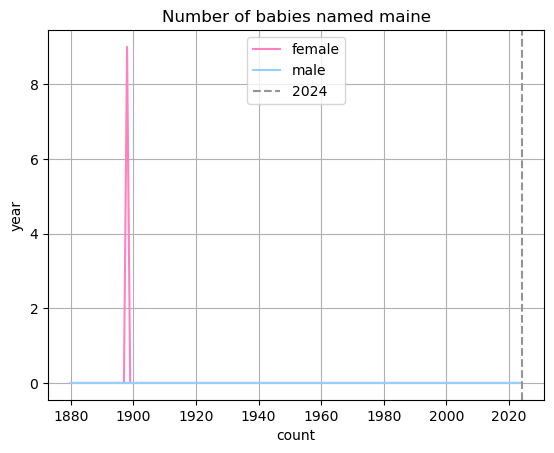

In 2024 there were 0 girls and 0 boys named maine.
For girls the name decreased from 1 to 1, a 0.00% decrease over 1880 to 2024.
For boys the name decreased from 1 to 1, a 0.00% decrease over 1880 to 2024.
There is a 200.00% difference between male and female, with more female.
There have been 9 girls named maine and 0 boys.


In [107]:
name = input("Enter the name: ")
min_y, max_y = year_input()
year = single_year_input(min_y, max_y)
show = True
name_counts_f, ignore = name_counts_years(name, "f", year, min_y, max_y)
name_counts_m, ignore = name_counts_years(name, "m", year, min_y, max_y)

total_sum_f = int(sum(name_counts_f))
percent_change_f, initial_f, final_f = calculate_percent_change(name_counts_f)
change_verb_f = "increase" if percent_change_f > 0 else "decrease"
percent_change_f = abs(percent_change_f)
total_sum_m = int(sum(name_counts_m))
percent_change_m, initial_m, final_m = calculate_percent_change(name_counts_m)
change_verb_m = "increase" if percent_change_m > 0 else "decrease"
percent_change_m = abs(percent_change_m)
per_diff = calculate_percent_diff(total_sum_f, total_sum_m)

plt.plot(range(min_y,max_y), name_counts_f, color = female_color, label = "female")
plt.plot(range(min_y,max_y), name_counts_m, color = male_color, label = "male")
format_graph(f"Number of babies named {name}", year, True)
plt.show()

print(f"In {year} there were {int(name_counts_f[year - min_y])} girls and {int(name_counts_m[year - min_y])} boys named {name}.")
print(f"For girls the name {change_verb_f}d from {initial_f} to {final_f}, a {percent_change_f:.2f}% {change_verb_f} over {min_y} to {max_y - 1}.")
print(f"For boys the name {change_verb_m}d from {initial_m} to {final_m}, a {percent_change_m:.2f}% {change_verb_m} over {min_y} to {max_y - 1}.")
print(f"There is a {per_diff:.2f}% difference between male and female, with more {"female" if total_sum_f > total_sum_m else "male"}.")
print(f"There have been {total_sum_f} girls named {name} and {total_sum_m} boys.")